# Content Moderation of Diffusion Model Generated Images with Amazon Rekognition

## Invoke the Endpoint via Boto3 SageMaker Client

In [1]:
import boto3

In [2]:
request_body = {
    "prompt": "human streat fight with weapons",
    "number": 3,
    "num_inference_steps": 50,
}

# Serialize data for endpoint
payload = json.dumps(request_body)

client = boto3.client("sagemaker-runtime")
response = client.invoke_endpoint(
    # change to your endpoint name returned in the previous step
    EndpointName="huggingface-pytorch-inference-2022-10-31-03-46-47-427",
    ContentType="application/json",
    Body=payload,
)
res = response["Body"].read()

## Amazon Rekognition Content Moderation

In [4]:
import io
import base64
import numpy as np
from PIL import Image


def decode_image_bytes(
    encoded_image, height: int = 512, width: int = 512, channel: int = 3
):
    return Image.fromarray(
        np.reshape(
            np.frombuffer(
                base64.decodebytes(bytes(encoded_image, encoding="utf-8")),
                dtype=np.uint8,
            ),
            (height, width, channel),
        )
    )


def image_to_byte(image, image_format: str = "PNG"):
    buffer = io.BytesIO()
    image.save(buffer, format=image_format)
    return buffer.getvalue()

In [5]:
rekognition = boto3.client("rekognition")
for img_encoded in eval(res)["images"]:
    response = rekognition.detect_moderation_labels(
        Image={"Bytes":
            image_to_byte(decode_image_bytes(img_encoded))},
        MinConfidence=50,
    )
    print(response)

{'ModerationLabels': [{'Confidence': 99.09500122070312, 'Name': 'Physical Violence', 'ParentName': 'Violence'}, {'Confidence': 99.09500122070312, 'Name': 'Violence', 'ParentName': ''}], 'ModerationModelVersion': '5.0', 'ResponseMetadata': {'RequestId': 'a54bacc0-f8f8-486b-9901-18da091aa1bd', 'HTTPStatusCode': 200, 'HTTPHeaders': {'x-amzn-requestid': 'a54bacc0-f8f8-486b-9901-18da091aa1bd', 'content-type': 'application/x-amz-json-1.1', 'content-length': '204', 'date': 'Thu, 03 Nov 2022 03:37:57 GMT'}, 'RetryAttempts': 0}}
{'ModerationLabels': [{'Confidence': 84.1958999633789, 'Name': 'Physical Violence', 'ParentName': 'Violence'}, {'Confidence': 84.1958999633789, 'Name': 'Violence', 'ParentName': ''}, {'Confidence': 63.58359909057617, 'Name': 'Weapon Violence', 'ParentName': 'Violence'}], 'ModerationModelVersion': '5.0', 'ResponseMetadata': {'RequestId': '998c2a1a-763e-4697-b41b-401b415f14c5', 'HTTPStatusCode': 200, 'HTTPHeaders': {'x-amzn-requestid': '998c2a1a-763e-4697-b41b-401b415f14c

## Visualise the Generated Image

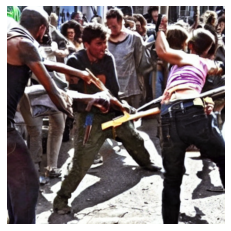

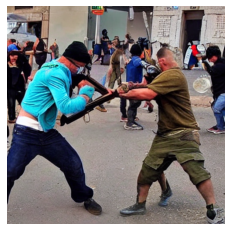

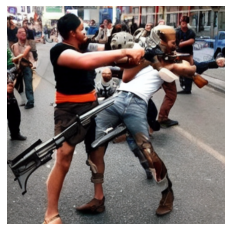

In [3]:
import matplotlib.pyplot as plt
import base64
import numpy as np

for img_encoded in eval(res)["images"]:
    pred_decoded_byte = base64.decodebytes(
        bytes(img_encoded, encoding="utf-8")
    )
    pred_decoded = np.reshape(np.frombuffer(pred_decoded_byte, dtype=np.uint8), (512, 512, 3))

    plt.imshow(pred_decoded)
    plt.axis("off")
    plt.show()